# import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file

In [2]:
df=pd.read_csv('weatherHistory.csv',parse_dates=['Formatted Date'])
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.info

<bound method DataFrame.info of                   Formatted Date        Summary Precip Type  Temperature (C)  \
0      2006-04-01 00:00:00+02:00  Partly Cloudy        rain         9.472222   
1      2006-04-01 01:00:00+02:00  Partly Cloudy        rain         9.355556   
2      2006-04-01 02:00:00+02:00  Mostly Cloudy        rain         9.377778   
3      2006-04-01 03:00:00+02:00  Partly Cloudy        rain         8.288889   
4      2006-04-01 04:00:00+02:00  Mostly Cloudy        rain         8.755556   
...                          ...            ...         ...              ...   
96448  2016-09-09 19:00:00+02:00  Partly Cloudy        rain        26.016667   
96449  2016-09-09 20:00:00+02:00  Partly Cloudy        rain        24.583333   
96450  2016-09-09 21:00:00+02:00  Partly Cloudy        rain        22.038889   
96451  2016-09-09 22:00:00+02:00  Partly Cloudy        rain        21.522222   
96452  2016-09-09 23:00:00+02:00  Partly Cloudy        rain        20.438889   

       

In [4]:
df.shape

(96453, 12)

# Dropping unwanted columns

In [5]:
df=df.drop(['Summary','Precip Type','Temperature (C)','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)','Daily Summary'],axis=1)

In [6]:
df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00+02:00,7.388889,0.89
1,2006-04-01 01:00:00+02:00,7.227778,0.86
2,2006-04-01 02:00:00+02:00,9.377778,0.89
3,2006-04-01 03:00:00+02:00,5.944444,0.83
4,2006-04-01 04:00:00+02:00,6.977778,0.83


# Converting time wise to date wise

In [7]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce',utc=True)

df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-03-31 22:00:00+00:00,7.388889,0.89
1,2006-03-31 23:00:00+00:00,7.227778,0.86
2,2006-04-01 00:00:00+00:00,9.377778,0.89
3,2006-04-01 01:00:00+00:00,5.944444,0.83
4,2006-04-01 02:00:00+00:00,6.977778,0.83


In [8]:
df

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-03-31 22:00:00+00:00,7.388889,0.89
1,2006-03-31 23:00:00+00:00,7.227778,0.86
2,2006-04-01 00:00:00+00:00,9.377778,0.89
3,2006-04-01 01:00:00+00:00,5.944444,0.83
4,2006-04-01 02:00:00+00:00,6.977778,0.83
...,...,...,...
96448,2016-09-09 17:00:00+00:00,26.016667,0.43
96449,2016-09-09 18:00:00+00:00,24.583333,0.48
96450,2016-09-09 19:00:00+00:00,22.038889,0.56
96451,2016-09-09 20:00:00+00:00,21.522222,0.60


# Setting Formatted Date as index

In [9]:
df.set_index('Formatted Date').head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,7.227778,0.86
2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,5.944444,0.83
2006-04-01 02:00:00+00:00,6.977778,0.83


# Resampling data to month wise and mean

In [10]:
df_mean = df.resample('M', on='Formatted Date').mean()
df_mean

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-31 00:00:00+00:00,21.383094,0.674046
2016-09-30 00:00:00+00:00,18.355833,0.688833
2016-10-31 00:00:00+00:00,8.923947,0.799906


# Ploting graph of variation in temperature and humidity in 10 years

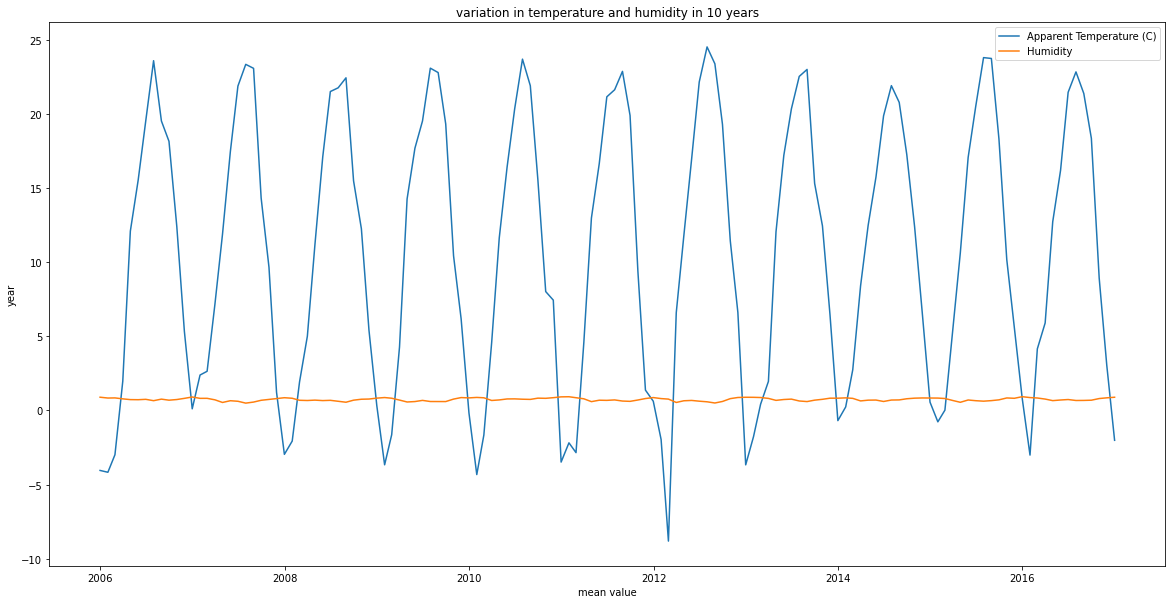

In [11]:
plt.figure(figsize=(20,10))
plt.plot(df_mean)
plt.ylabel("year")
plt.xlabel("mean value")
plt.title("variation in temperature and humidity in 10 years")
plt.legend(df_mean)
plt.show()

# Now month wise variation in temperature and humidity
# january

In [12]:
f1=df_mean[df_mean.index.month==1]
f1

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2007-01-31 00:00:00+00:00,2.387015,0.813495
2008-01-31 00:00:00+00:00,-2.069907,0.819476
2009-01-31 00:00:00+00:00,-3.669937,0.867621
2010-01-31 00:00:00+00:00,-4.329062,0.875914
2011-01-31 00:00:00+00:00,-2.186813,0.922030
2012-01-31 00:00:00+00:00,-1.965211,0.797581
2013-01-31 00:00:00+00:00,-1.768578,0.883105
2014-01-31 00:00:00+00:00,0.234536,0.846169


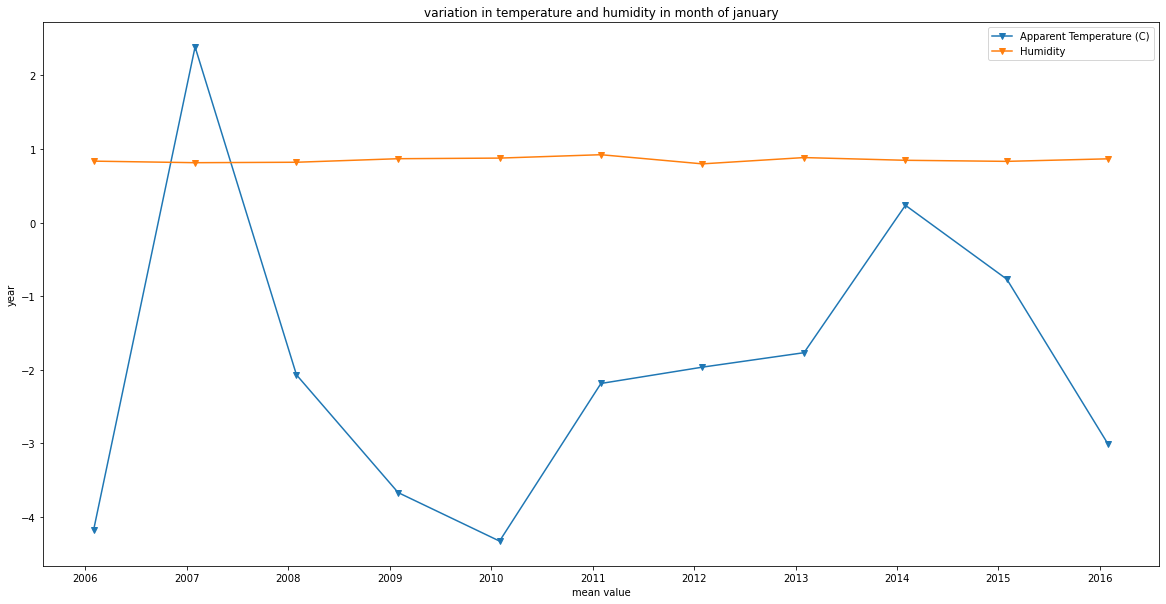

In [13]:
plt.figure(figsize=(20,10))
plt.plot(f1,marker='v')
plt.ylabel("year")
plt.xlabel("mean value")
plt.title("variation in temperature and humidity in month of january")
plt.legend(f1)
plt.show()

# February

In [14]:
f2=df_mean[df_mean.index.month==2]
f2

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2007-02-28 00:00:00+00:00,2.639848,0.815015
2008-02-29 00:00:00+00:00,1.915597,0.682615
2009-02-28 00:00:00+00:00,-1.641237,0.821161
2010-02-28 00:00:00+00:00,-1.662045,0.851682
2011-02-28 00:00:00+00:00,-2.849471,0.854137
2012-02-29 00:00:00+00:00,-8.817241,0.762859
2013-02-28 00:00:00+00:00,0.418171,0.869345
2014-02-28 00:00:00+00:00,2.742998,0.812530


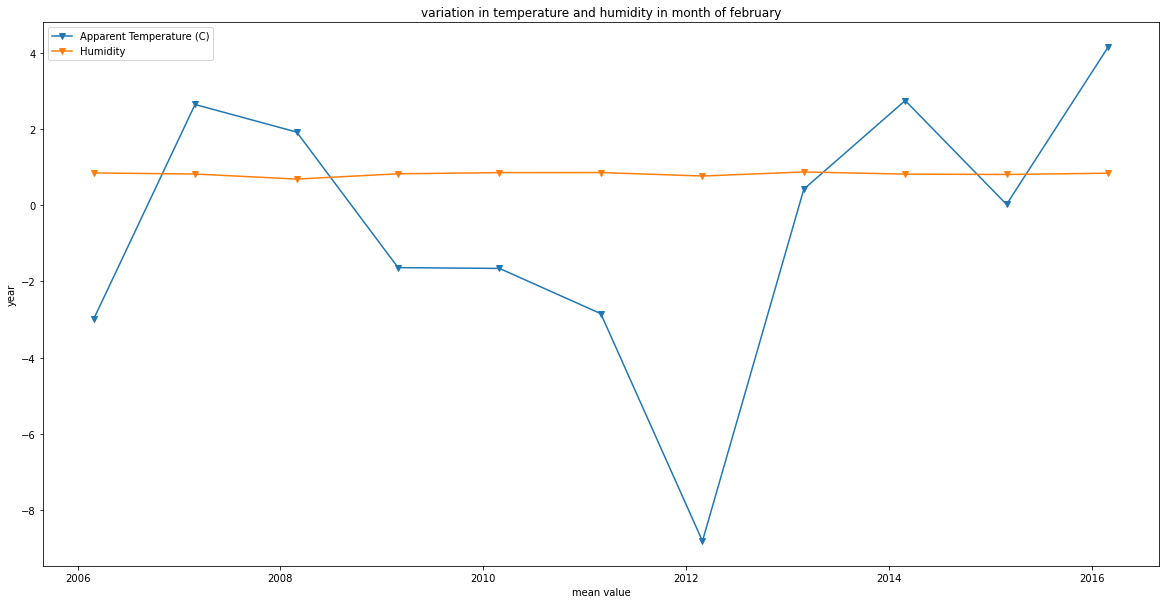

In [15]:
plt.figure(figsize=(20,10))
plt.plot(f2,marker='v')
plt.ylabel("year")
plt.xlabel("mean value")
plt.title("variation in temperature and humidity in month of february")
plt.legend(f2)
plt.show()

# March

In [16]:
f3=df_mean[df_mean.index.month==3]
f3

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 00:00:00+00:00,1.969780,0.778737
2007-03-31 00:00:00+00:00,7.174619,0.713884
2008-03-31 00:00:00+00:00,5.004353,0.668468
2009-03-31 00:00:00+00:00,4.280585,0.696680
2010-03-31 00:00:00+00:00,4.589038,0.670161
2011-03-31 00:00:00+00:00,4.589785,0.782970
2012-03-31 00:00:00+00:00,6.591502,0.535941
2013-03-31 00:00:00+00:00,1.957445,0.809946
2014-03-31 00:00:00+00:00,8.408303,0.640403


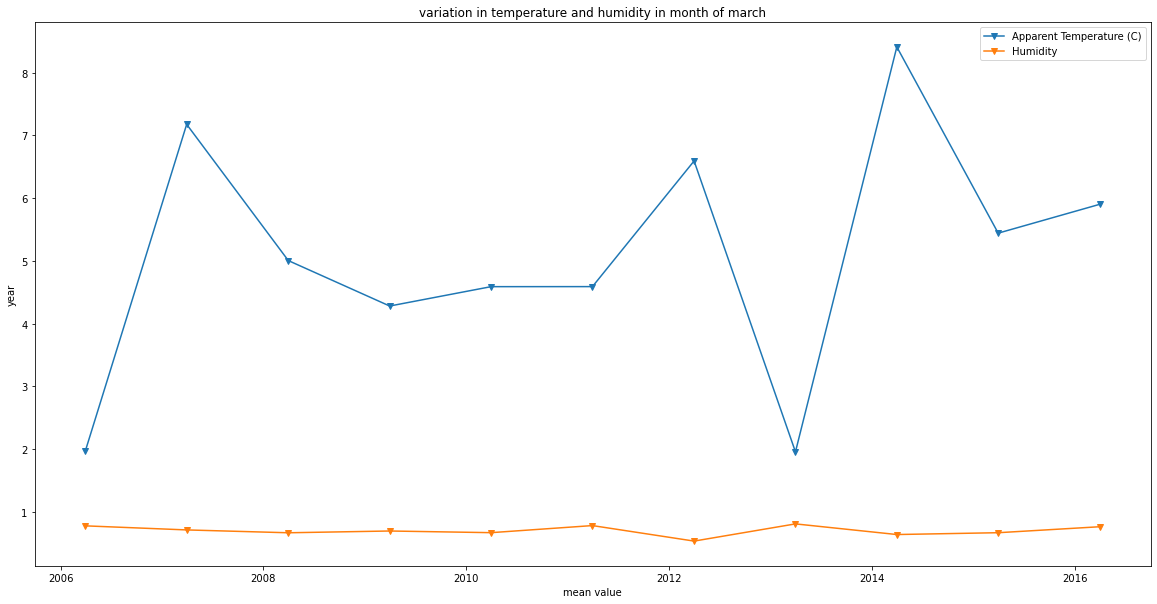

In [17]:
plt.figure(figsize=(20,10))
plt.plot(f3,marker='v')
plt.ylabel("year")
plt.xlabel("mean value")
plt.title("variation in temperature and humidity in month of march")
plt.legend(f3)
plt.show()

# April

In [18]:
f4=df_mean[df_mean.index.month==4]
f4

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-30 00:00:00+00:00,12.098827,0.728625
2007-04-30 00:00:00+00:00,11.894421,0.536361
2008-04-30 00:00:00+00:00,11.183688,0.693194
2009-04-30 00:00:00+00:00,14.267076,0.567847
2010-04-30 00:00:00+00:00,11.639406,0.706875
2011-04-30 00:00:00+00:00,12.978997,0.591625
2012-04-30 00:00:00+00:00,11.782770,0.650222
2013-04-30 00:00:00+00:00,12.045563,0.677667
2014-04-30 00:00:00+00:00,12.486181,0.691403


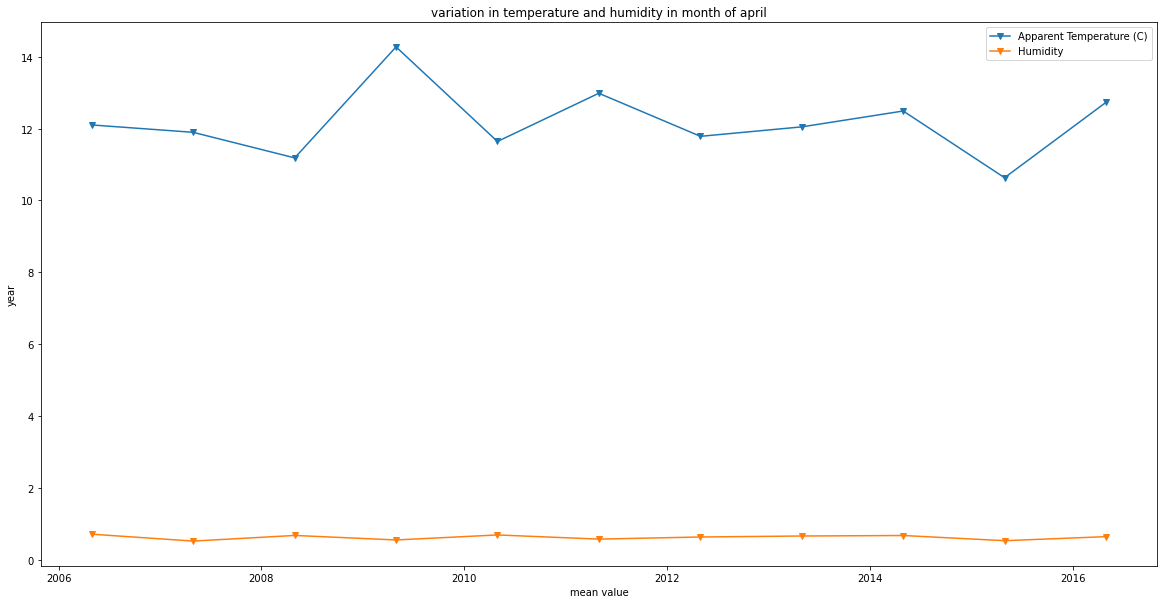

In [19]:
plt.figure(figsize=(20,10))
plt.plot(f4,marker='v')
plt.ylabel("year")
plt.xlabel("mean value")
plt.title("variation in temperature and humidity in month of april")
plt.legend(f4)
plt.show()

# May

In [20]:
f5=df_mean[df_mean.index.month==5]
f5

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-05-31 00:00:00+00:00,15.539479,0.721801
2007-05-31 00:00:00+00:00,17.453136,0.653253
2008-05-31 00:00:00+00:00,17.113583,0.663132
2009-05-31 00:00:00+00:00,17.691256,0.597151
2010-05-31 00:00:00+00:00,16.409879,0.773091
2011-05-31 00:00:00+00:00,16.644922,0.688038
2012-05-31 00:00:00+00:00,16.985596,0.672863
2013-05-31 00:00:00+00:00,17.208976,0.735309
2014-05-31 00:00:00+00:00,15.752218,0.698602


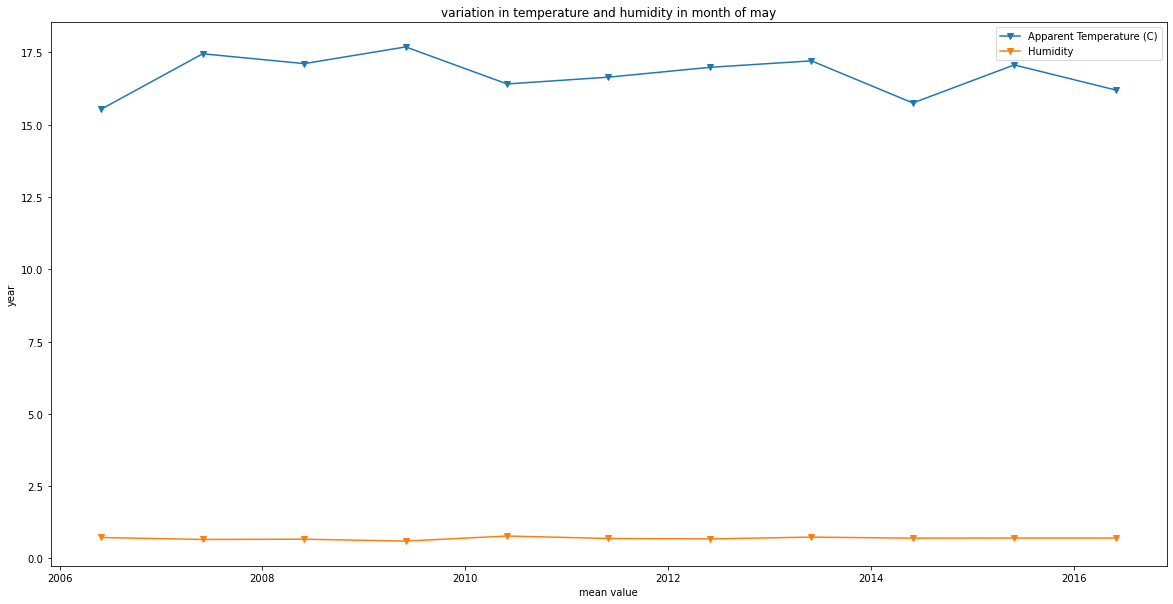

In [21]:
plt.figure(figsize=(20,10))
plt.plot(f5,marker='v')
plt.ylabel("year")
plt.xlabel("mean value")
plt.title("variation in temperature and humidity in month of may")
plt.legend(f5)
plt.show()

# June

In [22]:
f6=df_mean[df_mean.index.month==6]
f6

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-06-30 00:00:00+00:00,19.535965,0.747125
2007-06-30 00:00:00+00:00,21.883102,0.616486
2008-06-30 00:00:00+00:00,21.513750,0.679861
2009-06-30 00:00:00+00:00,19.526790,0.675944
2010-06-30 00:00:00+00:00,20.340571,0.778347
2011-06-30 00:00:00+00:00,21.157114,0.677611
2012-06-30 00:00:00+00:00,22.157130,0.622306
2013-06-30 00:00:00+00:00,20.345664,0.761847
2014-06-30 00:00:00+00:00,19.874306,0.602403


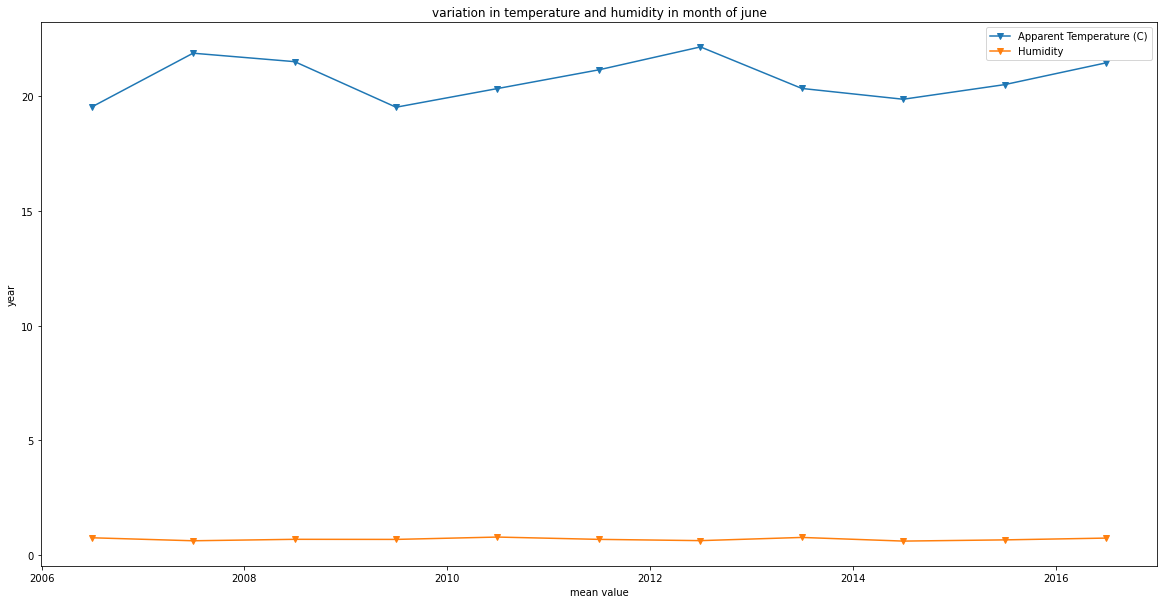

In [23]:
plt.figure(figsize=(20,10))
plt.plot(f6,marker='v')
plt.ylabel("year")
plt.xlabel("mean value")
plt.title("variation in temperature and humidity in month of june")
plt.legend(f6)
plt.show()

# July 

In [24]:
f7=df_mean[df_mean.index.month==7]
f7

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-07-31 00:00:00+00:00,23.595348,0.656304
2007-07-31 00:00:00+00:00,23.348081,0.491250
2008-07-31 00:00:00+00:00,21.765562,0.616022
2009-07-31 00:00:00+00:00,23.091614,0.600215
2010-07-31 00:00:00+00:00,23.699447,0.755323
2011-07-31 00:00:00+00:00,21.634984,0.707500
2012-07-31 00:00:00+00:00,24.525343,0.580860
2013-07-31 00:00:00+00:00,22.533669,0.636586
2014-07-31 00:00:00+00:00,21.911598,0.699393


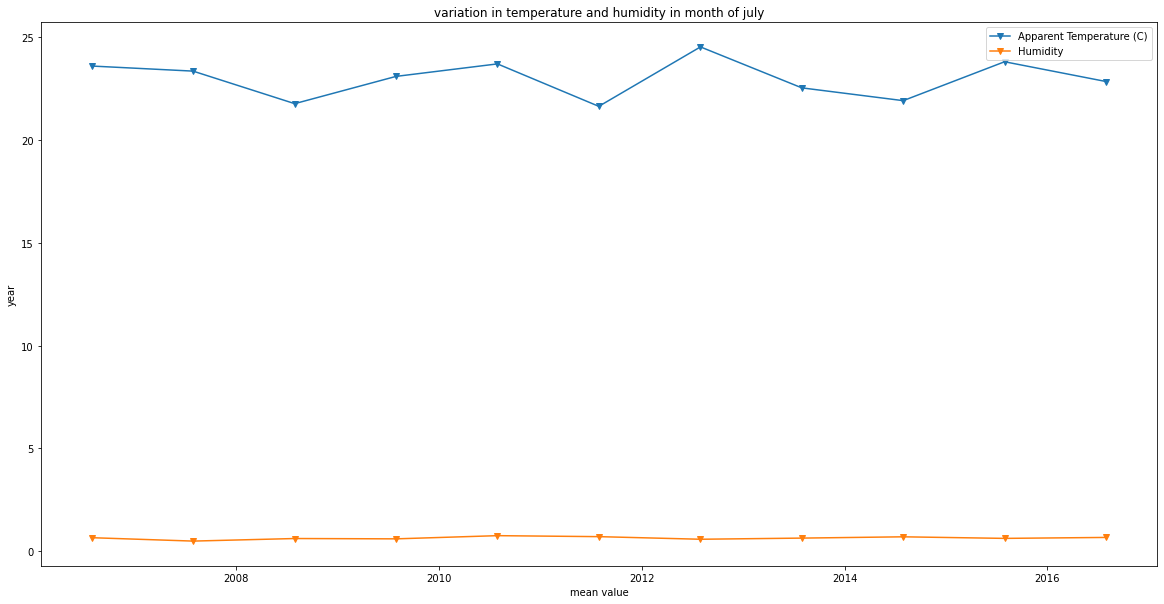

In [25]:
plt.figure(figsize=(20,10))
plt.plot(f7,marker='v')
plt.ylabel("year")
plt.xlabel("mean value")
plt.title("variation in temperature and humidity in month of july")
plt.legend(f7)
plt.show()

# August

In [26]:
f8=df_mean[df_mean.index.month==8]
f8

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-08-31 00:00:00+00:00,19.528241,0.760753
2007-08-31 00:00:00+00:00,23.079689,0.562876
2008-08-31 00:00:00+00:00,22.438852,0.551895
2009-08-31 00:00:00+00:00,22.794205,0.597231
2010-08-31 00:00:00+00:00,21.906713,0.742786
2011-08-31 00:00:00+00:00,22.874126,0.631263
2012-08-31 00:00:00+00:00,23.384334,0.500081
2013-08-31 00:00:00+00:00,23.005249,0.596263
2014-08-31 00:00:00+00:00,20.781870,0.707809


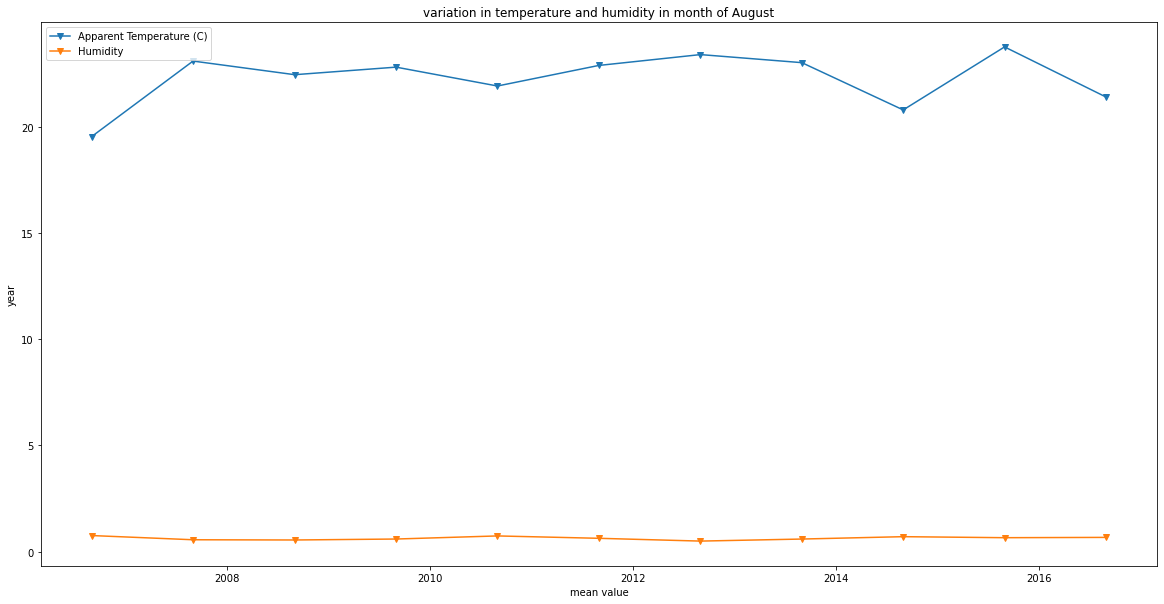

In [27]:
plt.figure(figsize=(20,10))
plt.plot(f8,marker='v')
plt.ylabel("year")
plt.xlabel("mean value")
plt.title("variation in temperature and humidity in month of August")
plt.legend(f8)
plt.show()

# September

In [28]:
f9=df_mean[df_mean.index.month==9]
f9

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-09-30 00:00:00+00:00,18.155571,0.689444
2007-09-30 00:00:00+00:00,14.328457,0.682708
2008-09-30 00:00:00+00:00,15.489606,0.690722
2009-09-30 00:00:00+00:00,19.322353,0.596764
2010-09-30 00:00:00+00:00,15.549414,0.826806
2011-09-30 00:00:00+00:00,19.899900,0.611375
2012-09-30 00:00:00+00:00,19.302948,0.603319
2013-09-30 00:00:00+00:00,15.317477,0.691986
2014-09-30 00:00:00+00:00,17.258387,0.785944


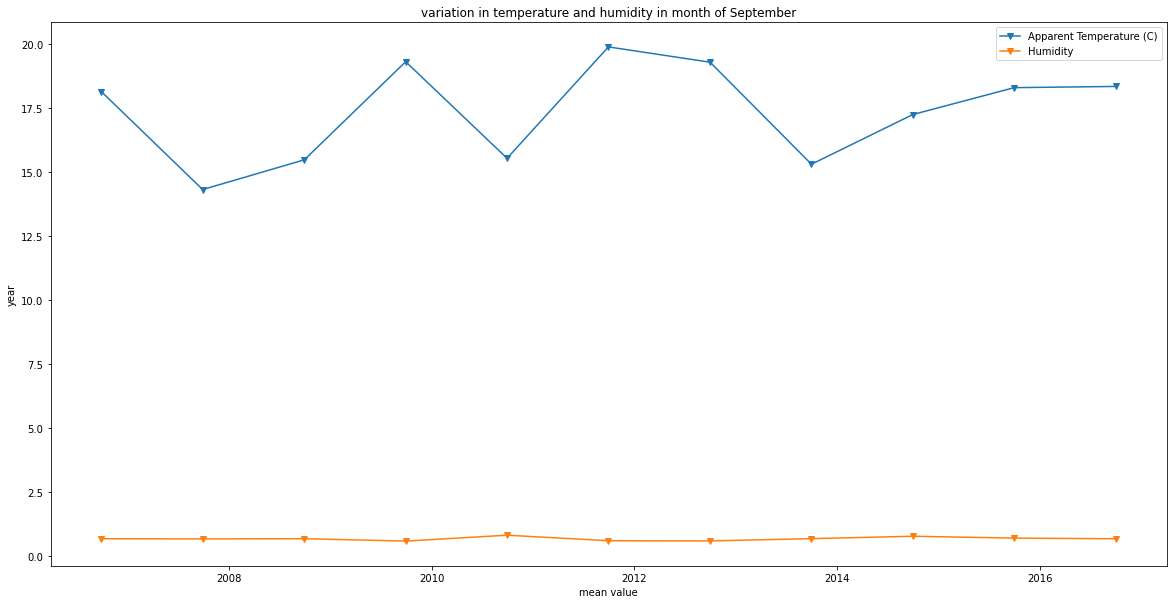

In [29]:
plt.figure(figsize=(20,10))
plt.plot(f9,marker='v')
plt.ylabel("year")
plt.xlabel("mean value")
plt.title("variation in temperature and humidity in month of September")
plt.legend(f9)
plt.show()

# October

In [30]:
f10=df_mean[df_mean.index.month==10]
f10

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-10-31 00:00:00+00:00,12.398678,0.733642
2007-10-31 00:00:00+00:00,9.662612,0.740954
2008-10-31 00:00:00+00:00,12.253390,0.753911
2009-10-31 00:00:00+00:00,10.433535,0.763468
2010-10-31 00:00:00+00:00,8.017145,0.815538
2011-10-31 00:00:00+00:00,9.405167,0.701747
2012-10-31 00:00:00+00:00,11.435581,0.794315
2013-10-31 00:00:00+00:00,12.449134,0.748750
2014-10-31 00:00:00+00:00,12.381803,0.826116


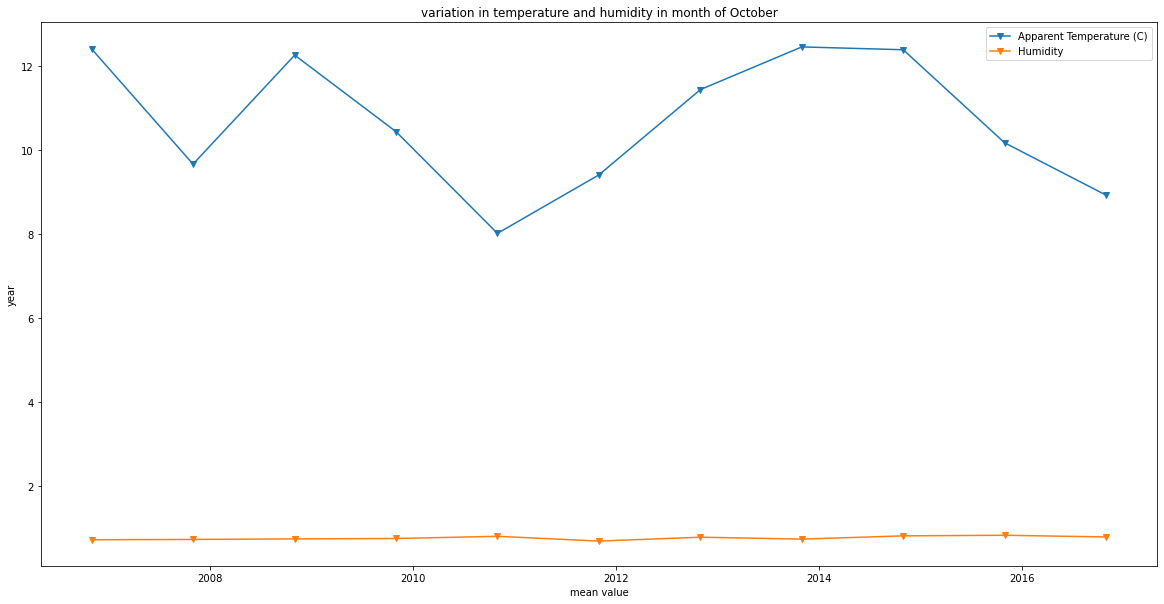

In [31]:
plt.figure(figsize=(20,10))
plt.plot(f10,marker='v')
plt.ylabel("year")
plt.xlabel("mean value")
plt.title("variation in temperature and humidity in month of October")
plt.legend(f10)
plt.show()

# November

In [32]:
f11=df_mean[df_mean.index.month==11]
f11

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-11-30 00:00:00+00:00,5.328310,0.812722
2007-11-30 00:00:00+00:00,1.218225,0.801444
2008-11-30 00:00:00+00:00,5.415039,0.766972
2009-11-30 00:00:00+00:00,6.177222,0.865292
2010-11-30 00:00:00+00:00,7.440934,0.858722
2011-11-30 00:00:00+00:00,1.368519,0.800528
2012-11-30 00:00:00+00:00,6.608133,0.871389
2013-11-30 00:00:00+00:00,6.425664,0.824792
2014-11-30 00:00:00+00:00,6.639097,0.839736


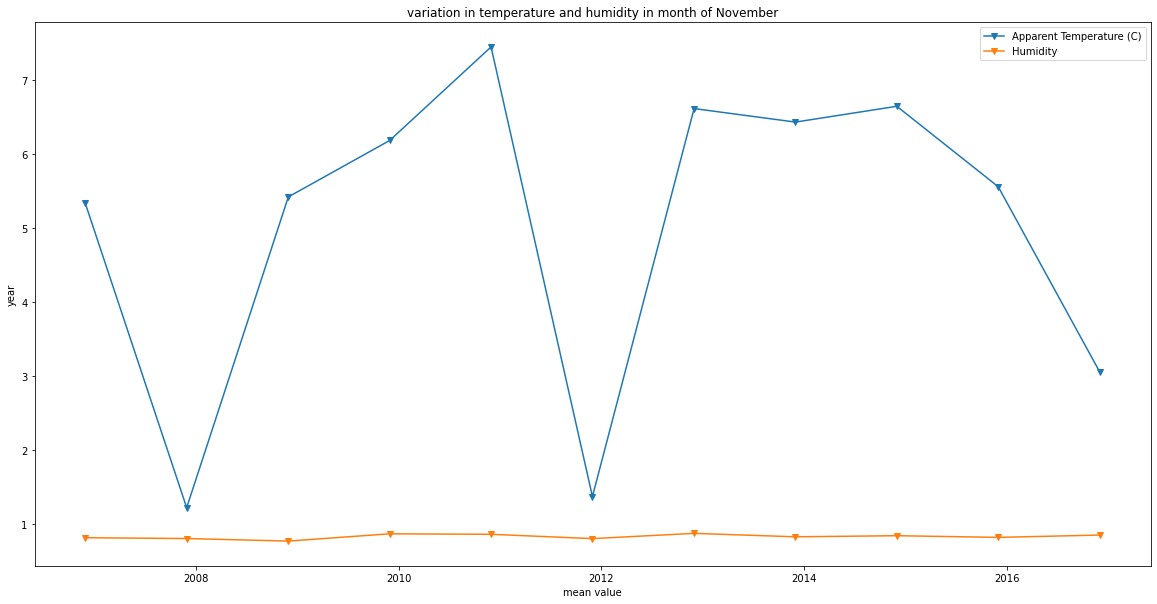

In [33]:
plt.figure(figsize=(20,10))
plt.plot(f11,marker='v')
plt.ylabel("year")
plt.xlabel("mean value")
plt.title("variation in temperature and humidity in month of November")
plt.legend(f11)
plt.show()

# December

In [34]:
f12=df_mean[df_mean.index.month==12]
f12

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-12-31 00:00:00+00:00,0.107310,0.905376
2007-12-31 00:00:00+00:00,-2.964897,0.856250
2008-12-31 00:00:00+00:00,0.327389,0.828226
2009-12-31 00:00:00+00:00,-0.169086,0.844637
2010-12-31 00:00:00+00:00,-3.485947,0.913602
2011-12-31 00:00:00+00:00,0.618093,0.866223
2012-12-31 00:00:00+00:00,-3.672909,0.886801
2013-12-31 00:00:00+00:00,-0.690054,0.823965


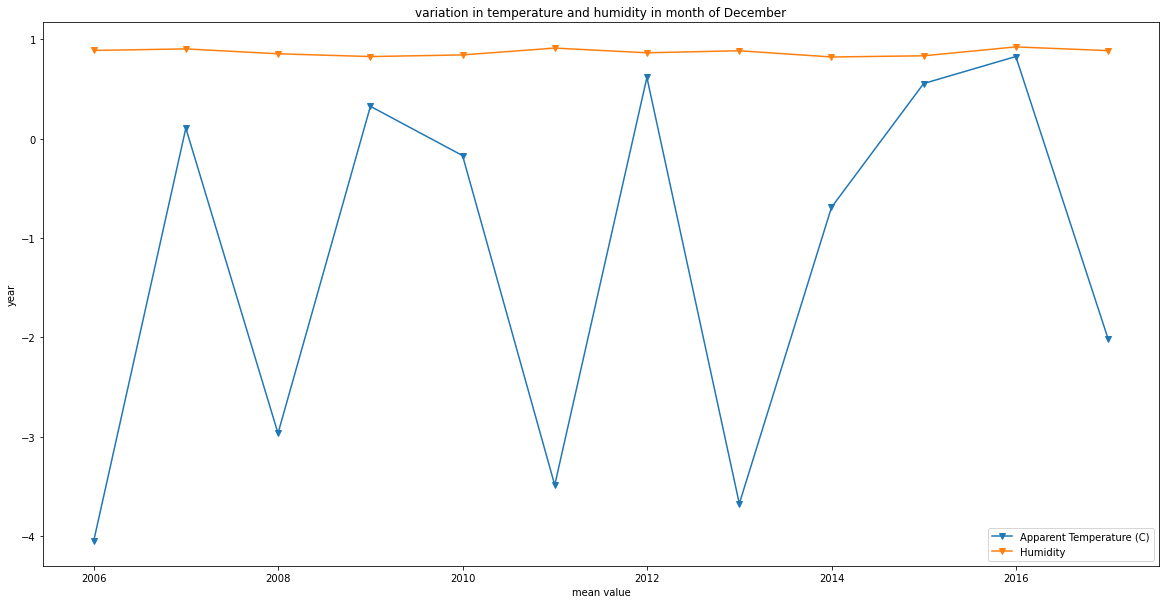

In [35]:
plt.figure(figsize=(20,10))
plt.plot(f12,marker='v')
plt.ylabel("year")
plt.xlabel("mean value")
plt.title("variation in temperature and humidity in month of December")
plt.legend(f12)
plt.show()

#  you can have a look to my blog on medium 
   meghagoriya067